<div class='bar_title'></div>

*Simulation for Decision Making (S4DM)*

# 4. Input modeling (Python example)

Gunther Gust & Ignacio Ubeda <br>
Chair for Enterprise AI <br>
Data Driven Decisions Group <br>
Center for Artificial Intelligence and Data Science (CAIDAS)

<img src="images/d3.png" style="width:20%; float:left;" />

<img src="images/CAIDASlogo.png" style="width:20%; float:left;" />

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from matplotlib import pyplot as plt

## Fitting a distribution

Recall the steps:

1. Collect data
2. Summarize in a frequency distribution (histogram) to identify the shape of the distribution
3. Identify underlying theoretical probability distribution, or a family of distributions
4. Obtain parameter(s) for the distribution chosen, probably estimated from the data
5. Test for fit

### 1. "Collect data" (in this case, simply load the data)

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,itt
0,0,6.712715
1,1,19.912847
2,2,9.652699
3,3,3.649776
4,4,3.692356


### 2. Summarize in a frequency distribution (histogram) to identify the shape of the distribution

<Axes: xlabel='itt', ylabel='Count'>

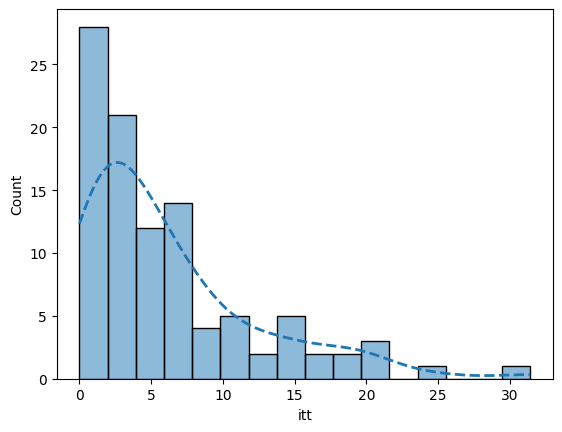

In [3]:
# Create a histogram of the data (hint: use the histplot() from the seaborn package)
sns.histplot(x=df['itt'], binwidth=2, kde=True, line_kws = {'linestyle':'dashed', 'linewidth':'2'})

### 3. Identify underlying theoretical probability distribution, or a family of distributions

__Your turn:__ Which distribution(s) seam reasonable?

__Your answer:__

### 4. Identify underlying theoretical probability distribution, or a family of distributions

__Your turn:__ Try to fit an exponential distribution 

Hint: We know that $\lambda = \frac{1}{\overline{X}}$, where $\overline{X}$ is the sample mean

In [4]:
# Your code here....
lamb_fit = 1/np.mean(df['itt'])

print(lamb_fit)

0.16212929601802153


__Your turn:__ Try to fit a normal distribution 

Hint: We know that $\mu = {\overline{X}}$ and $\sigma = {\overline{S}}$, where $\overline{X}$ is the sample mean and $\overline{S}$ the sample standard deviation

In [5]:
# Your code here....
mu_fit = np.mean(df['itt'])
sigma_fit = np.std(df['itt'])

print(mu_fit, sigma_fit)

6.167916746451824 6.150683238836726


### 5. Test for fit

We have reviewed 3 different ways for testing for fit:

1. QQ-plot (visually)
2. Chi-square (statistical test)
3. Kolmogorov-Smirnov (KS) (statistical test)


#### QQ-plot (visually)

__Your turn:__ Create a QQ-plot to test the fit of the exponential distribution! Hint: use the `qqplot()` function from the `statsmodels` library. Check out the [documentation](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html) to understand the usage.

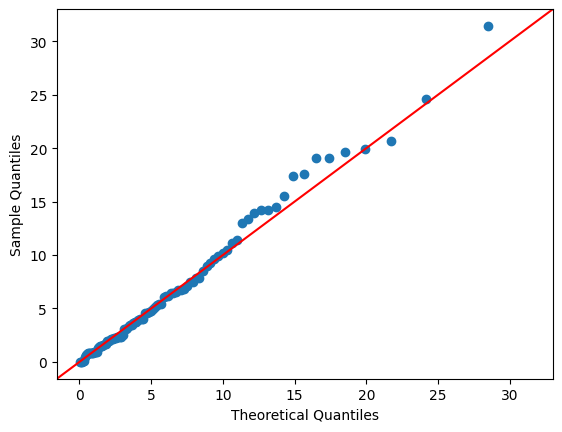

In [8]:
# Complete the code below....
res = sm.qqplot(data = df['itt'], dist=stats.expon, line ='45', loc = 0, scale = 1/lamb_fit) 

##### Normal distribution 

__Your turn:__ Create a QQ-plot to test the fit of the normal distribution! Hint: use the `qqplot()` function from the `statsmodels` library. Check out the [documentation](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html) to understand the usage.

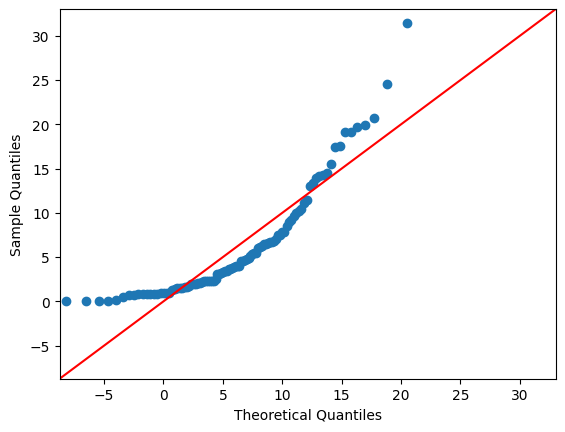

In [9]:
# Your code here....
res = sm.qqplot(data=df['itt'], dist=stats.norm, line ='45', loc = mu_fit, scale = sigma_fit) 

#### Kolmogorov-Smirnov (KS) statistical test

__Your turn:__ Run a KS test for the expoential distribution (complete the code below). 

In [16]:
#Complete the code...
significance_level = 0.05

test_result = stats.kstest(rvs=df['itt'], cdf='expon', args=(0, 1/lamb_fit))

print(test_result)

if (test_result.pvalue < significance_level): # How do test_result.pvalue and the significance_level need to be related?
    print('Reject the null hypothesis => "poor" fit')
else:
    print('Fail to reject the null hypothesis => "good" fit')

KstestResult(statistic=0.06335930815426633, pvalue=0.7930474387629918, statistic_location=2.348338601709803, statistic_sign=1)
Fail to reject the null hypothesis => "good" fit


__Your turn:__ Run the same KS test for the normal distribution

In [17]:
# Your code here
significance_level = 0.05

test_result = stats.kstest(rvs=df['itt'], cdf='norm', args=(mu_fit, sigma_fit))

print(test_result)

if (test_result.pvalue < significance_level): # How do test_result.pvalue and the significance_level need to be related?
    print('Reject the null hypothesis => "poor" fit')
else:
    print('Fail to reject the null hypothesis => "good" fit')


KstestResult(statistic=0.15907038904431792, pvalue=0.011201141838699857, statistic_location=6.800059177250943, statistic_sign=1)
Reject the null hypothesis => "poor" fit


## Fitting a distribution (automatically)

The above steps can be (somehow) automatized. This becomes relevant in two situations:
- There are no closed form "formulas" for estimating the parameters (such as the Gamma distribution)
- There are several distributions we'd like to test "at once"

There are several tools for doing so. Some `python` packages:

- [`distfit`](https://erdogant.github.io/distfit/pages/html/index.html)
- [`fitter`](https://fitter.readthedocs.io/en/latest/)
- [`scipy.stats.rv_continuous.fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.fit.html#scipy.stats.rv_continuous.fit)

We'll use the last one since we're already using `scipy`.

First, we'll fit (and evaluate) one distribution, then we'll generalize it for fitting (and evaluating) several distributions

In [36]:
significance_level = 0.05

#define distribution (in this case, the exponential distribution)
dist = stats.expon
print(dist.name)

#fit the data to the distribution, and get the parameters
dist_parameters = dist.fit(df['itt'])
print(dist_parameters)

#evaluate with the kolmogorov-smirnov test
test_result = stats.kstest(df['itt'], dist.name, args=dist_parameters)

print(test_result)

if test_result.pvalue < significance_level:
    print('Reject the null hypothesis => "poor" fit')
else:
    print('Fail to reject the null hypothesis => "good" fit')

expon
(0.0, 6.167916746451824)
KstestResult(statistic=0.06335930815426633, pvalue=0.7930474387629918, statistic_location=2.348338601709803, statistic_sign=1)
Fail to reject the null hypothesis => "good" fit


Now, let's fit several distributions 

In [45]:
significance_level = 0.05

distributions = [stats.expon, stats.norm, stats.uniform, stats.gamma, stats.beta] #we can add more distributions, in this case we're evaluating 5 distributions

results = {}
for dist in distributions:

    #fit the data to the distribution, and get the parameters, in this case we're using the maximum likelihood estimation (mle)
    dist_parameters = dist.fit(df['itt'], method='mle')

    #evaluate with the kolmogorov-smirnov test
    test_result = stats.kstest(df['itt'], dist.name, args=dist_parameters)

    #save the test results and the parameters
    results[dist.name] = {'test': test_result, 'params': dist_parameters}

    if test_result.pvalue < significance_level:
        print(f'{dist.name} is a "poor" fit')
    else:
        print(f'{dist.name} is a "good" fit')

expon is a "good" fit
norm is a "poor" fit
uniform is a "poor" fit
gamma is a "good" fit
beta is a "good" fit


In [50]:
results

{'expon': {'test': KstestResult(statistic=0.06335930815426633, pvalue=0.7930474387629918, statistic_location=2.348338601709803, statistic_sign=1),
  'params': (0.0, 6.167916746451824)},
 'norm': {'test': KstestResult(statistic=0.15907038904431792, pvalue=0.011201141838699857, statistic_location=6.800059177250943, statistic_sign=1),
  'params': (6.167916746451824, 6.150683238836726)},
 'uniform': {'test': KstestResult(statistic=0.5005657484046692, pvalue=1.0660625677286608e-23, statistic_location=7.842283745570574, statistic_sign=1),
  'params': (0.0, 31.440284144671068)},
 'gamma': {'test': KstestResult(statistic=0.0845721285554975, pvalue=0.44743097709199064, statistic_location=0.6943786911487858, statistic_sign=-1),
  'params': (0.8479388778863048, -9.275162218807813e-27, 6.880576790887249)},
 'beta': {'test': KstestResult(statistic=0.0769377574073366, pvalue=0.5680809234148924, statistic_location=0.6943786911487858, statistic_sign=-1),
  'params': (0.761137977272186,
   4.8793210103

Two distributions are "good" fit, exponential and beta distribution.

In [52]:
print(results['expon']['params'])
print(results['expon']['test'].pvalue)
print('-'*50)

print(results['beta']['params'])
print(results['beta']['test'].pvalue)

(0.0, 6.167916746451824)
0.7930474387629918
--------------------------------------------------
(0.761137977272186, 4.879321010332198, -9.964873206858897e-31, 48.6291869146291)
0.5680809234148924


Let us inspect the results graphically.


#### Exponential distribution 

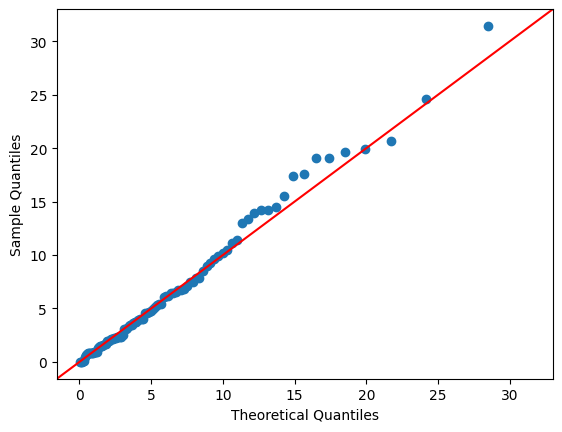

In [53]:
# Create the qq plot 
res = sm.qqplot(data = df['itt'], dist=stats.expon, line ='45', loc = results['expon']['params'][0], scale = results['expon']['params'][1])

It is also a good idea to plot the histogram against the fitted distribution. We provide the code below (however, check out how alternating the `binwidth` affects the results!):

<Axes: xlabel='itt', ylabel='Count'>

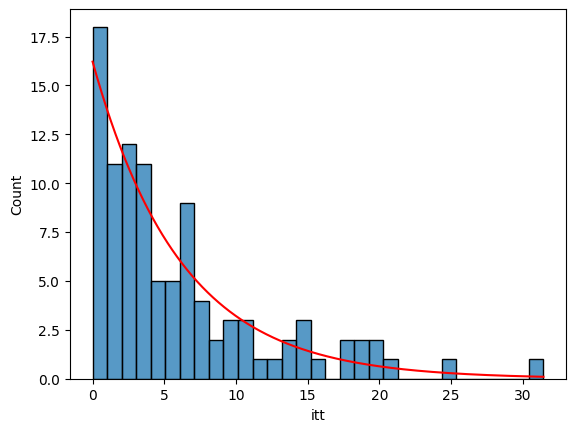

In [54]:
#compute fitted PDF distribution
x = np.arange(df['itt'].min(), df['itt'].max(), 0.01)
y = stats.expon.pdf(x, loc=results['expon']['params'][0], scale=results['expon']['params'][1])

#adjust y to the number of samples (pdf is a density function)
y = len(df['itt']) * y

#plot histogram and fitted PDF (in red)
sns.histplot(x=df['itt'], binwidth=1)
sns.lineplot(x=x, y=y, color='red')

#### Beta distribution 

In [55]:
results['beta']['params']

#For the beta distribution, the parameters are alpha and beta, loc and scale.  
#0: alpha
#1: beta
#2: loc
#3: scale

(0.761137977272186,
 4.879321010332198,
 -9.964873206858897e-31,
 48.6291869146291)

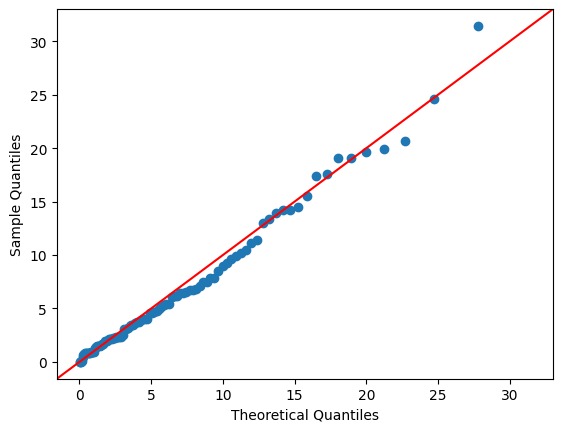

In [56]:
# Generate the same plots for the beta distribution
res = sm.qqplot(data = df['itt'], dist=stats.beta, line ='45', loc = results['beta']['params'][2], scale = results['beta']['params'][3],
                distargs=(results['beta']['params'][0], results['beta']['params'][1]))

<Axes: xlabel='itt', ylabel='Count'>

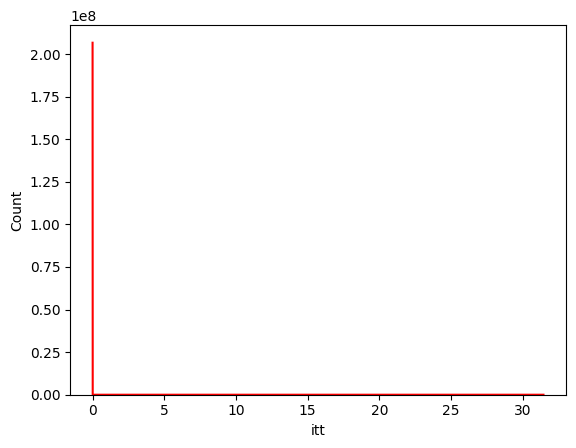

In [57]:
#compute fitted PDF distribution
x = np.arange(df['itt'].min(), df['itt'].max(), 0.01)
y = stats.beta.pdf(x, a= results['beta']['params'][0], b = results['beta']['params'][1], loc=results['beta']['params'][2], scale=results['beta']['params'][3])

#adjust y to the number of samples (pdf is a density function)
y = len(df['itt']) * y

#plot histogram and fitted PDF (in red)
sns.histplot(x=df['itt'], binwidth=1)
sns.lineplot(x=x, y=y, color='red')

The graphical inspection suggests that the exponential distribution is the one to choose as the "best fit" distribution. Therefore we select the eponential distribution with the fitted parameters as the distribution for our data.


<img src="images/d3.png" style="width:50%; float:center;" />
